In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# assumes aeon 0.11
import aeon
from aeon.datasets import load_classification
from aeon.classification.shapelet_based import ShapeletTransformClassifier
from aeon.classification.sklearn import RotationForestClassifier
from aeon.transformations.collection.shapelet_based import RandomShapeletTransform
from sklearn.ensemble import RandomForestClassifier
from aeon.visualisation import ShapeletClassifierVisualizer

In [2]:
X_train, y_train = load_classification("ShapeletSim", split="train")
X_test, y_test = load_classification("ShapeletSim", split="test")
# X_test, y_test = load_classification("sonar", split="train")

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(f"shape of the array: {X_train.shape}")
print(f"n_samples = {X_train.shape[0]}")
print(f"n_channels = {X_train.shape[1]}")
print(f"n_timepoints = {X_train.shape[2]}")
print("training samples:", X_train.shape[0])
print("testing samples:", X_test.shape[0])
unique_values, counts = np.unique(y_train, return_counts=True)
print(unique_values, counts)

shape of the array: (20, 1, 500)
n_samples = 20
n_channels = 1
n_timepoints = 500
training samples: 20
testing samples: 180
[0 1] [10 10]


In [3]:
class_0 = y_train == 0
class_1 = y_train == 1

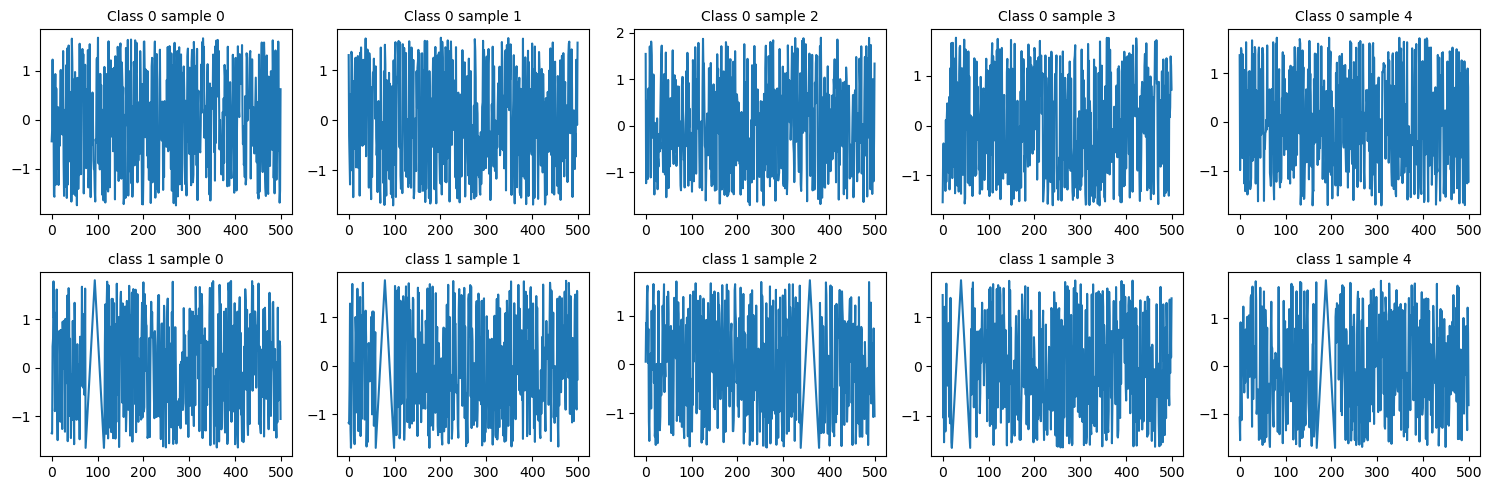

In [4]:
fig, axes =plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    axes[0, i].plot(X_train[class_0][i, 0, :])
    axes[0, i].set_title(f'Class 0 sample {i}', fontsize=10)

    axes[1, i].plot(X_train[class_1][i, 0, :])
    axes[1, i].set_title(f'class 1 sample {i}', fontsize=10)
plt.tight_layout()
plt.show()

The RandomShapeletTransform transformer takes a set of labelled training time series in the fit function, randomly samples n_shapelet_samples shapelets, keeping the best max_shapelets. The resulting shapelets are used in the transform function to create a new tabular dataset, where each row represents a time series instance, and each column stores the distance from a time series to a shapelet.

In [5]:
clf = ShapeletTransformClassifier(
    estimator=RandomForestClassifier(n_estimators=10),
    n_shapelet_samples=100,
    max_shapelets=10,
    batch_size=20,
    n_jobs=-1
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        90
           1       0.95      0.91      0.93        90

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180



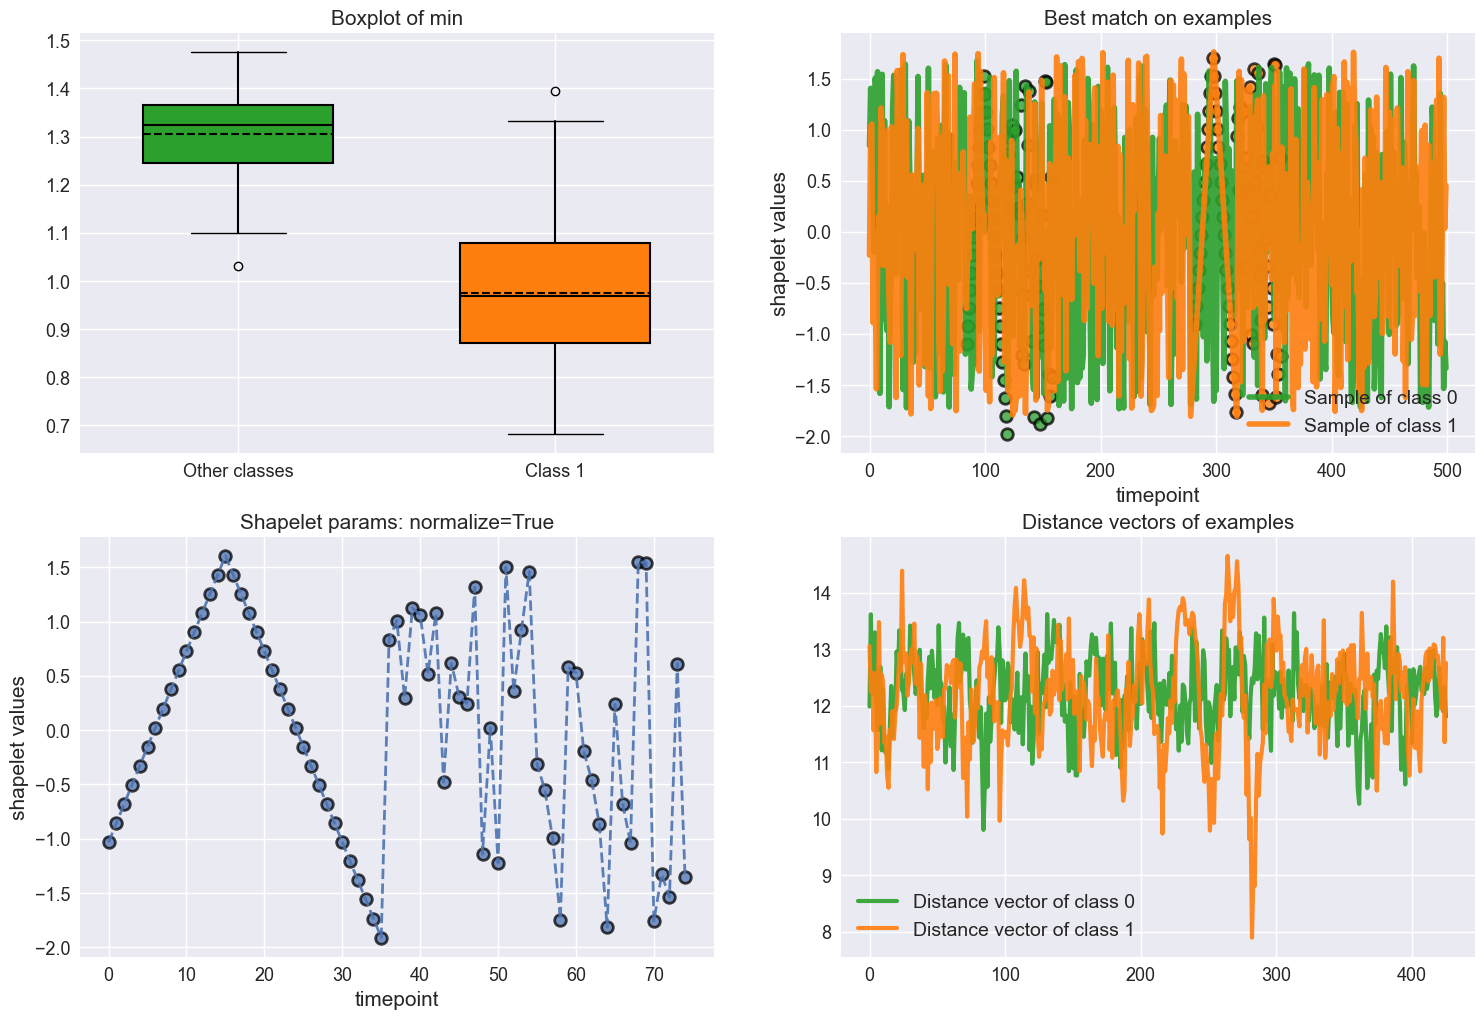

In [8]:
stc_vis = ShapeletClassifierVisualizer(clf)
id_class = 1
fig = stc_vis.visualize_shapelets_one_class(
    X_test,
    y_test,
    id_class,
    figure_options={"figsize": (18, 12), "nrows": 2, "ncols": 2},
)

Global interpretability: the shapelets that helped the most (bottom left) and their min distance to samples from each class (top left)

Text(0.5, 1.0, 'Class 1 test sample')

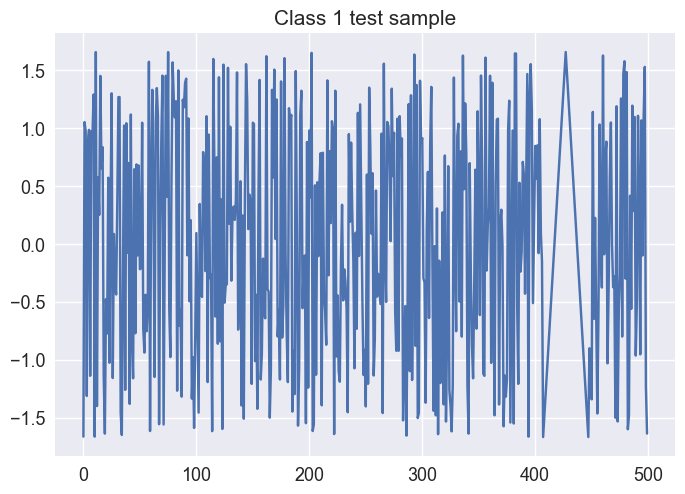

In [9]:
class_0 = y_test == 0
class_1 = y_test == 1
plt.plot(X_test[class_1][0, 0, :])
plt.title("Class 1 test sample")

Local Interpretability: find the best fit shapelet for that data sample:

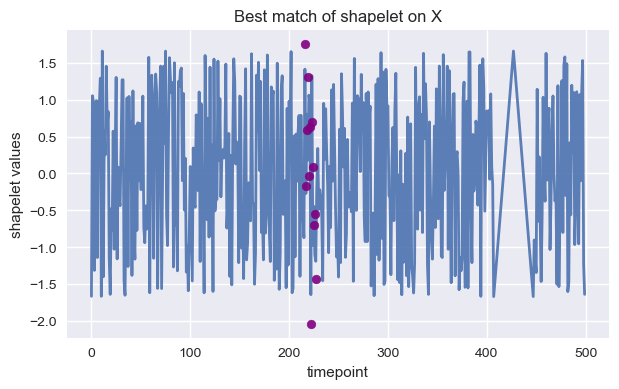

In [10]:
distances = clf._transformer.transform(X_test[class_1][0])
best_shapelet_index = np.argmin(distances)
best_shapelet = clf._transformer.shapelets[best_shapelet_index]
fig = stc_vis.plot_on_X(best_shapelet_index, X_test[class_1][0], figure_options={"figsize": (7, 4)})